<a href="https://colab.research.google.com/github/ujjawalsingh10/Pytorch-Deep-Learning/blob/main/01_Pytorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## Data (Preparing and Loading)

In [67]:
## Creating known parameters
weight = 0.7
bias = 0.3

##
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [68]:
len(X), len(y)

(50, 50)

### Splitting the dataset into training and test sets

In [69]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [70]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))

  ## Training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')

  ## Testing in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

  ## Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size':14});

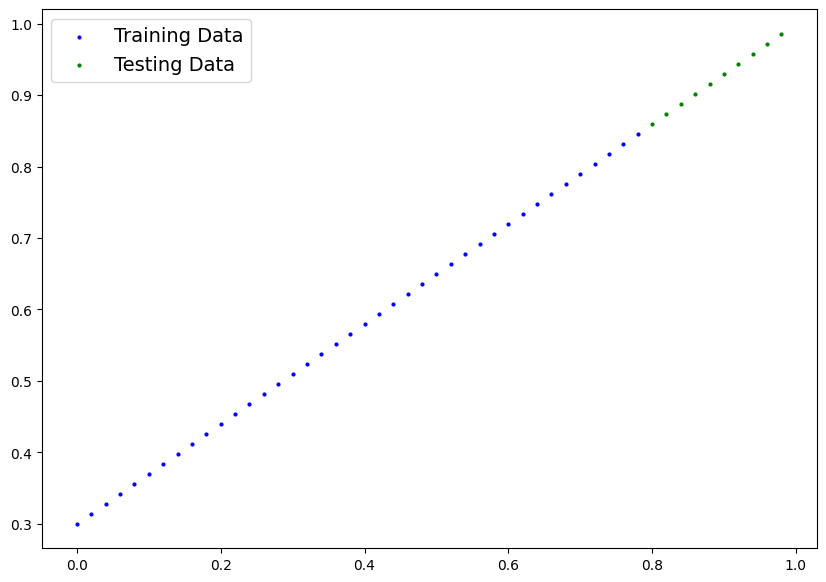

In [71]:
plot_predictions();

## Building a model

In [72]:
from torch import nn

## Create Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

    ## Forward method to define computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Pytorch model building essentials

* torch.nn - contains all buildings for computational graphs (Neural network is a computational graph)
* torch.nn.Parameter - what params our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module -  the base class for all nn modules, if you subclass it, you should override forward
* torch.optim - optimizers/ help with graad descent


### Checking contents of our pytorch model

In [73]:
## creating a random seed
torch.manual_seed(42)

## Creating instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [74]:
## list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

In [75]:
X_test.T, y_test.T

(tensor([[0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
          0.9800]]),
 tensor([[0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
          0.9860]]))

In [76]:
## make prediction with model
with torch.inference_mode():
  y_preds = model_0(X_test)

## Can also do similar with torch.no_grad(), inference_mode is preferred

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

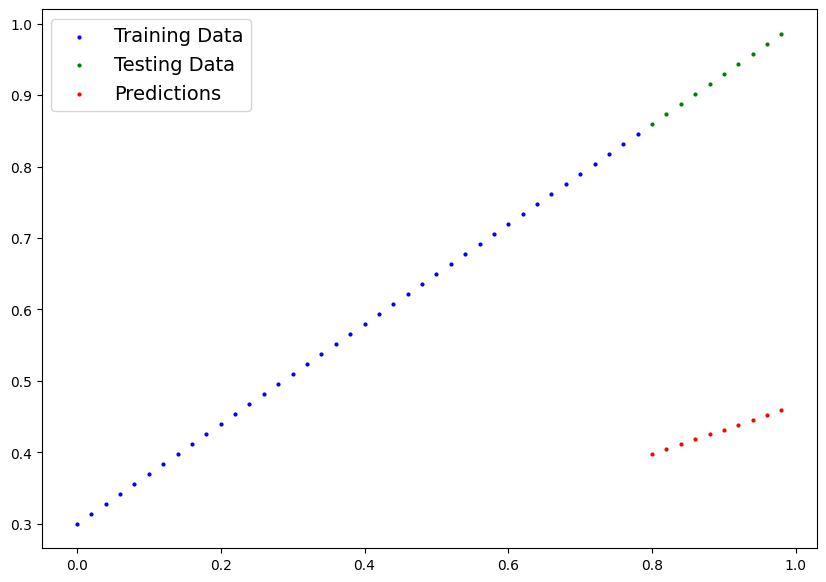

In [77]:
plot_predictions(predictions=y_preds)

## Train Model

In [78]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [79]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### setting up loss func and optimizer

In [80]:
## Loss function
loss_fn = nn.L1Loss()

## Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

### Building a training and testing Loop

In [81]:
torch.manual_seed(42)

epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

## Loop through the data
for epoch in range(epochs):
  model_0.train()

  # forward pass
  y_pred = model_0(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  ## backprop on loss wrt to parameters of the model
  loss.backward()

  # Step the optimizer (perform grad descent)
  optimizer.step()

  ##### Testing
  model_0.eval() ## turns off  settings in model not needed for evaluation/testing(turns off batch norm/dropouts)
  with torch.inference_mode(): ## turns off gradient tracking and couple more things bts

    ## Forward pass
    test_pred = model_0(X_test)

    ## Cal test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    ## print our model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

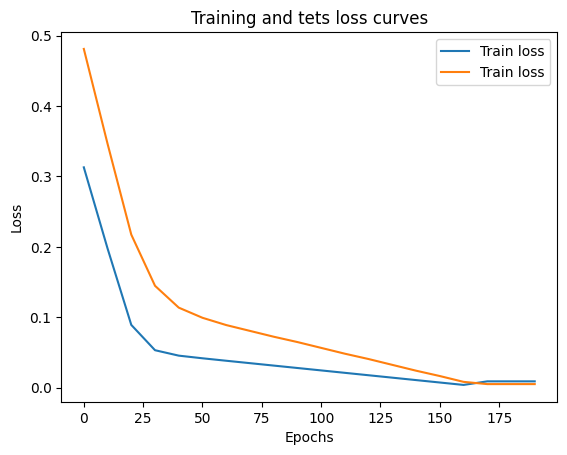

In [84]:
import numpy as np
## Plotting the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label='Train loss')
plt.title('Training and tets loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

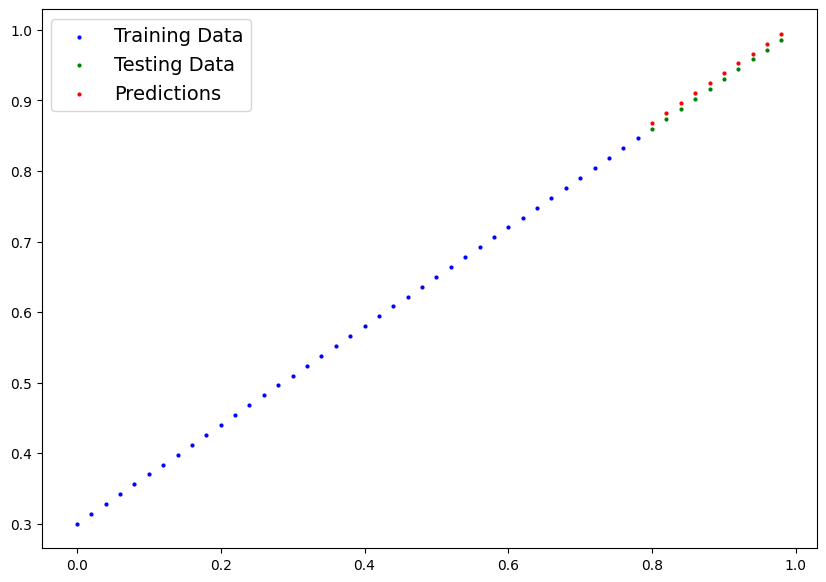

In [65]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions = y_preds)

In [36]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])